# Data Cleaning and Preprocessing Steps

This notebook follows a structured approach to clean and preprocess the CPL dataset for analysis and modeling. Each step is implemented in a separate code cell for clarity and reproducibility.

## 1. Data preprocessing

In [16]:
# Step 1: Import libraries and load data
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the dataset
path = os.path.join("data", "Dataset_AM_final.csv") 
data = pd.read_csv(path, sep=',')
data.head()

,Cost_per_Lead_anon,Click-Throug_Rate_anon,Conversion_Rate_anon,date,day,day_of_the_week,month,quater,year,campaign_max_day,campaign_max_week,campaign_max_month,campaign_max_total,traffic_source_campaign_name_anon,target_business_anon,target_region_anon,vertical_anon,country_anon,customer_name_anon,business_region_anon
0,0.0,0.0,0.0,2024-01-18,18,4,1,1,2024,65.0,NaN,0.0,1120.0,traffic_source_campaign_name_001,target_business_001,target_region_001,vertical_001,country_001,customer_name_001,business_region_001
1,0.0,0.0,0.0,2024-02-03,3,6,2,1,2024,31.0,NaN,0.0,1000.0,traffic_source_campaign_name_001,target_business_001,target_region_001,vertical_001,country_001,customer_name_001,business_region_001
2,0.0,0.0,0.0,2024-02-11,11,7,2,1,2024,31.0,NaN,0.0,1000.0,traffic_source_campaign_name_001,target_business_001,target_region_001,vertical_001,country_001,customer_name_001,business_region_001
3,0.0,0.0,0.0,2024-04-03,3,3,4,2,2024,5.0,NaN,0.0,200.0,traffic_source_campaign_name_001,target_business_001,target_region_001,vertical_001,country_001,customer_name_001,business_region_001
4,0.0,0.0,0.0,2024-08-03,3,6,8,3,2024,NaN,NaN,NaN,NaN,traffic_source_campaign_name_001,target_business_001,target_region_001,vertical_001,country_001,customer_name_001,business_region_001


In [134]:
data.dtypes

Cost_per_Lead_anon                   float64
Click-Throug_Rate_anon               float64
Conversion_Rate_anon                 float64
date                                  object
day                                    int64
day_of_the_week                        int64
month                                  int64
quater                                 int64
year                                   int64
campaign_max_day                     float64
campaign_max_week                    float64
campaign_max_month                   float64
campaign_max_total                   float64
traffic_source_campaign_name_anon     object
target_business_anon                  object
target_region_anon                    object
vertical_anon                         object
country_anon                          object
customer_name_anon                    object
business_region_anon                  object
dtype: object

In [17]:
# Step 2: Handle missing values
# Numeric columns to fill with median
numeric_cols = ['campaign_max_day', 'campaign_max_month', 'campaign_max_total', 'campaign_max_week']
for col in numeric_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].fillna(data[col].median())

# Categorical columns to fill with 'Unknown'
categorical_cols = ['target_business_anon', 'target_region_anon']
for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].fillna('Unknown')

data.head()

,Cost_per_Lead_anon,Click-Throug_Rate_anon,Conversion_Rate_anon,date,day,day_of_the_week,month,quater,year,campaign_max_day,campaign_max_week,campaign_max_month,campaign_max_total,traffic_source_campaign_name_anon,target_business_anon,target_region_anon,vertical_anon,country_anon,customer_name_anon,business_region_anon
0,0.0,0.0,0.0,2024-01-18,18,4,1,1,2024,65.0,0.0,0.0,1120.0,traffic_source_campaign_name_001,target_business_001,target_region_001,vertical_001,country_001,customer_name_001,business_region_001
1,0.0,0.0,0.0,2024-02-03,3,6,2,1,2024,31.0,0.0,0.0,1000.0,traffic_source_campaign_name_001,target_business_001,target_region_001,vertical_001,country_001,customer_name_001,business_region_001
2,0.0,0.0,0.0,2024-02-11,11,7,2,1,2024,31.0,0.0,0.0,1000.0,traffic_source_campaign_name_001,target_business_001,target_region_001,vertical_001,country_001,customer_name_001,business_region_001
3,0.0,0.0,0.0,2024-04-03,3,3,4,2,2024,5.0,0.0,0.0,200.0,traffic_source_campaign_name_001,target_business_001,target_region_001,vertical_001,country_001,customer_name_001,business_region_001
4,0.0,0.0,0.0,2024-08-03,3,6,8,3,2024,13.0,0.0,585.0,0.0,traffic_source_campaign_name_001,target_business_001,target_region_001,vertical_001,country_001,customer_name_001,business_region_001


In [18]:
# Step 3: Convert data types
# Convert numeric columns
numeric_conversion = ['Cost_per_Lead_anon', 'Click-Throug_Rate_anon', 'Conversion_Rate_anon']
for col in numeric_conversion:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d', errors='coerce')

data.dtypes

Cost_per_Lead_anon                          float64
Click-Throug_Rate_anon                      float64
Conversion_Rate_anon                        float64
date                                 datetime64[ns]
day                                           int64
day_of_the_week                               int64
month                                         int64
quater                                        int64
year                                          int64
campaign_max_day                            float64
campaign_max_week                           float64
campaign_max_month                          float64
campaign_max_total                          float64
traffic_source_campaign_name_anon            object
target_business_anon                         object
target_region_anon                           object
vertical_anon                                object
country_anon                                 object
customer_name_anon                           object
business_reg

In [19]:
# Step 4: Remove or correct incorrect data
# Clip CTR / Conversion
for col in ['Conversion_Rate_anon', 'Click-Throug_Rate_anon']:
    if col in data.columns:
        data[col] = data[col].clip(lower=0, upper=1)

data[[col for col in ['Conversion_Rate_anon', 'Click-Throug_Rate_anon'] if col in data.columns]].describe()

,Conversion_Rate_anon,Click-Throug_Rate_anon
count,186250.000000,186250.000000
mean,0.352885,0.422087
std,0.248234,0.254366
min,0.000000,0.000000
25%,0.163292,0.229069
50%,0.329845,0.434798
75%,0.515341,0.604106
max,1.000000,1.000000


In [20]:
# Step 5: Handle duplicates
# Remove duplicates
print(f"Number of rows before removing duplicates: {len(data)}")
data = data.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(data)}")

Number of rows before removing duplicates: 186250
Number of rows after removing duplicates: 186250


In [21]:
# Step 6: Feature engineering

def create_features(df):
    # data['day_of_year'] = data['date'].dt.dayofyear
    # data['week_of_year'] = data['date'].dt.isocalendar().week
    # data['month'] = data['date'].dt.month
    # data['day_of_week'] = data['date'].dt.weekday

    # Lag feature (previous day CPL)
    group_by_col = 'traffic_source_campaign_name_anon'

    for lag in [1,2,3,7]:
        df[f'cpl_lag_{lag}'] = df.groupby(group_by_col)['Cost_per_Lead_anon'].shift(lag)  # campaign_name_anon
    
    # Rolling avg
    df['rolling_mean'] = df['Cost_per_Lead_anon'].rolling(window=3).mean()

    return df

# # Lag feature: previous day's CPL (grouped by campaign if available)
# if 'Cost_per_Lead_anon' in data.columns:
#     if 'campaign_name_anon' in data.columns:
#         data = data.sort_values(['campaign_name_anon', 'date'])
#         data['prev_day_cpl'] = data.groupby('campaign_name_anon')['Cost_per_Lead_anon'].shift(1)
#     else:
#         data = data.sort_values('date')
#         data['prev_day_cpl'] = data['Cost_per_Lead_anon'].shift(1)

data = create_features(data)

In [22]:
# Step 7: Outlier detection and treatment
# Use IQR to cap outliers in numeric columns
iqr_cols  = ['Cost_per_Lead_anon', 'Click-Throug_Rate_anon', 'Conversion_Rate_anon', 'campaign_max_day', 'campaign_max_month', 'campaign_max_total', 'campaign_max_week']

for col in iqr_cols:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        data[col] = data[col].clip(low, high)

data[iqr_cols].describe()

,Cost_per_Lead_anon,Click-Throug_Rate_anon,Conversion_Rate_anon,campaign_max_day,campaign_max_month,campaign_max_total,campaign_max_week
count,186250.000000,186250.000000,186250.000000,186250.000000,186250.000000,186250.0,186250.0
mean,0.238537,0.422087,0.352885,32.815485,970.895275,0.0,0.0
std,0.187992,0.254366,0.248234,43.364022,1085.652369,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.103864,0.229069,0.163292,0.000000,0.000000,0.0,0.0
50%,0.193909,0.434798,0.329845,13.000000,585.000000,0.0,0.0
75%,0.336541,0.604106,0.515341,50.000000,1500.000000,0.0,0.0
max,0.685556,1.000000,1.000000,125.000000,3750.000000,0.0,0.0


### What is IQR?

The Interquartile Range (IQR) is a measure of statistical dispersion, or how spread out the values in a dataset are. It is calculated as the difference between the third quartile (Q3, the 75th percentile) and the first quartile (Q1, the 25th percentile):

$$
\text{IQR} = Q3 - Q1
$$

- **Q1 (First Quartile):** The value below which 25% of the data fall.
- **Q3 (Third Quartile):** The value below which 75% of the data fall.

The IQR is commonly used to detect outliers. Values that fall below $Q1 - 1.5 \times IQR$ or above $Q3 + 1.5 \times IQR$ are often considered outliers.

In [23]:
# Step 8: Normalize/standardize numeric features
from sklearn.preprocessing import StandardScaler

scale_cols = ['Cost_per_Lead_anon', 'Click-Throug_Rate_anon', 'Conversion_Rate_anon', 'campaign_max_day', 'campaign_max_month', 'campaign_max_total', 'campaign_max_week', 'cpl_lag_1', 'cpl_lag_2', 'cpl_lag_3', 'cpl_lag_7', 'rolling_mean']

scaler = StandardScaler()
for col in scale_cols:
    if col in data.columns:
        data[col] = scaler.fit_transform(data[[col]])

data[scale_cols].head()

,Cost_per_Lead_anon,Click-Throug_Rate_anon,Conversion_Rate_anon,campaign_max_day,campaign_max_month,campaign_max_total,campaign_max_week,cpl_lag_1,cpl_lag_2,cpl_lag_3,cpl_lag_7,rolling_mean
0,-1.268869,-1.659371,-1.421589,0.742196,-0.894299,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,-1.268869,-1.659371,-1.421589,-0.041866,-0.894299,0.0,0.0,-1.168293,NaN,NaN,NaN,NaN
2,-1.268869,-1.659371,-1.421589,-0.041866,-0.894299,0.0,0.0,-1.168293,-1.175375,NaN,NaN,-1.464051
3,-1.268869,-1.659371,-1.421589,-0.641443,-0.894299,0.0,0.0,-1.168293,-1.175375,-1.179583,NaN,-1.464051
4,-1.268869,-1.659371,-1.421589,-0.456958,-0.355451,0.0,0.0,-1.168293,-1.175375,-1.179583,NaN,-1.464051


In [24]:
cat_cols = [
    'ad_name_anon', 'day_of_the_week', 'campaign_name_anon', 'target_business_anon', 'target_region_anon',
    'traffic_source_campaign_name_anon', 'vertical_anon', 'country_anon', 'customer_name_anon', 'business_region_anon'
]

for col in cat_cols:
    if col in data.columns:
        print(f"{col}: {data[col].nunique()} unique values")
    else:
        print(f"{col}: Not in dataset")

ad_name_anon: Not in dataset
day_of_the_week: 7 unique values
campaign_name_anon: Not in dataset
target_business_anon: 6 unique values
target_region_anon: 1 unique values
traffic_source_campaign_name_anon: 2812 unique values
vertical_anon: 36 unique values
country_anon: 26 unique values
customer_name_anon: 152 unique values
business_region_anon: 1 unique values


In [25]:
# Step 9: Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# One-hot encode selected categorical columns
onehot_cols = ['day_of_the_week', 'target_business_anon']  # not anymore in dataset:  'ad_name_anon', 'campaign_name_anon'  # 'traffic_source_campaign_name_anon', 'vertical_anon', 'country_anon', 'customer_name_anon', 'business_region_anon'
onehot_cols = [col for col in onehot_cols if col in data.columns]
data = pd.get_dummies(data, columns=onehot_cols, drop_first=True)

# # categorical_extra = ['traffic_source_campaign_name_anon', 'vertical_anon', 'country_anon', 'customer_name_anon']
# label_encode_cols = [
#     'traffic_source_campaign_name_anon',
#     'vertical_anon',
#     'country_anon',
#     'customer_name_anon'
# ]

# for col in label_encode_cols:
#     if col in data.columns:
#         le = LabelEncoder()
#         data[col] = le.fit_transform(data[col].astype(str))

data.head()

,Cost_per_Lead_anon,Click-Throug_Rate_anon,Conversion_Rate_anon,date,day,month,quater,year,campaign_max_day,campaign_max_week,...,day_of_the_week_3,day_of_the_week_4,day_of_the_week_5,day_of_the_week_6,day_of_the_week_7,target_business_anon_target_business_002,target_business_anon_target_business_003,target_business_anon_target_business_004,target_business_anon_target_business_005,target_business_anon_target_business_006
0,-1.268869,-1.659371,-1.421589,2024-01-18,18,1,1,2024,0.742196,0.0,...,False,True,False,False,False,False,False,False,False,False
1,-1.268869,-1.659371,-1.421589,2024-02-03,3,2,1,2024,-0.041866,0.0,...,False,False,False,True,False,False,False,False,False,False
2,-1.268869,-1.659371,-1.421589,2024-02-11,11,2,1,2024,-0.041866,0.0,...,False,False,False,False,True,False,False,False,False,False
3,-1.268869,-1.659371,-1.421589,2024-04-03,3,4,2,2024,-0.641443,0.0,...,True,False,False,False,False,False,False,False,False,False
4,-1.268869,-1.659371,-1.421589,2024-08-03,3,8,3,2024,-0.456958,0.0,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# # Step 10: Check for data consistency
# # Validate day_of_week_name entries
# valid_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# if 'day_of_week_name' in data.columns:
#     invalid_days = set(data['day_of_week_name'].unique()) - set(valid_days)
#     print(f"Invalid day_of_week_name entries: {invalid_days}")

In [27]:
print(data['target_region_anon'].value_counts())
print()
print(data['business_region_anon'].value_counts())

target_region_anon
target_region_001    186250
Name: count, dtype: int64

business_region_anon
business_region_001    186250
Name: count, dtype: int64


In [28]:
# Step 11: Remove unnecessary columns
# Drop columns not useful for analysis or prediction
# Example: drop columns with all missing values or high correlation
empty_cols = [col for col in data.columns if data[col].isnull().all()]
no_data_cols = drop_cols = ['target_region_anon', 'business_region_anon']
cols_to_drop = empty_cols + no_data_cols
print(f"Dropped columns: {cols_to_drop}")
data.drop(columns=cols_to_drop, inplace=True)

# Optionally, drop columns by name if known to be redundant
# data.drop(columns=['some_column'], inplace=True)

data.head()

Dropped columns: ['target_region_anon', 'business_region_anon']


,Cost_per_Lead_anon,Click-Throug_Rate_anon,Conversion_Rate_anon,date,day,month,quater,year,campaign_max_day,campaign_max_week,...,day_of_the_week_3,day_of_the_week_4,day_of_the_week_5,day_of_the_week_6,day_of_the_week_7,target_business_anon_target_business_002,target_business_anon_target_business_003,target_business_anon_target_business_004,target_business_anon_target_business_005,target_business_anon_target_business_006
0,-1.268869,-1.659371,-1.421589,2024-01-18,18,1,1,2024,0.742196,0.0,...,False,True,False,False,False,False,False,False,False,False
1,-1.268869,-1.659371,-1.421589,2024-02-03,3,2,1,2024,-0.041866,0.0,...,False,False,False,True,False,False,False,False,False,False
2,-1.268869,-1.659371,-1.421589,2024-02-11,11,2,1,2024,-0.041866,0.0,...,False,False,False,False,True,False,False,False,False,False
3,-1.268869,-1.659371,-1.421589,2024-04-03,3,4,2,2024,-0.641443,0.0,...,True,False,False,False,False,False,False,False,False,False
4,-1.268869,-1.659371,-1.421589,2024-08-03,3,8,3,2024,-0.456958,0.0,...,False,False,False,True,False,False,False,False,False,False


In [15]:
data['year'].value_counts()

year
2024    99499
2025    86751
Name: count, dtype: int64

In [29]:
# # Step 12: Data splitting

# # Drop 2021 completely
# data = data[data['date'].dt.year != 2021]

# train_df = data[(data['date'].dt.year == 2024)] # data[(data['date'].dt.year >= 2022) & (data['date'].dt.year <= 2023)]
# # val_df   = data[data['date'].dt.year == 2024]  # optional
# test_df  = data[data['date'].dt.year >= 2025] 


# Drop rows where lag features or all targets are NaN
target_col  = ['Cost_per_Lead_anon']

# Use all columns except the target as features
feature_cols = [col for col in data.columns if col != target_col]

# Split train/val/test chronologically
train_df = data[data['date'].dt.year == 2024].copy()
val_df = data[(data['date'].dt.year == 2025) & (data['date'].dt.dayofyear <= 182)].copy()
test_df = data[(data['date'].dt.year == 2025) & (data['date'].dt.dayofyear > 182)].copy()

X_train = train_df[feature_cols]
y_train = train_df[target_col]

X_val   = val_df[feature_cols]
y_val   = val_df[target_col]

X_test  = test_df[feature_cols]
y_test  = test_df[target_col]

# train_size = int(len(data) * 0.8)

# train_data, test_data = data[:train_size], data[train_size:]

In [13]:
with pd.option_context(
    'display.max_columns', None,
    'display.width', None,
    'display.max_colwidth', None
):
    display(data[21:30])

,Cost_per_Lead_anon,Click-Throug_Rate_anon,Conversion_Rate_anon,date,day,day_of_the_week,month,quater,year,campaign_max_day,campaign_max_week,campaign_max_month,campaign_max_total,traffic_source_campaign_name_anon,target_business_anon,vertical_anon,country_anon,customer_name_anon,cpl_lag_1,cpl_lag_2,cpl_lag_3,cpl_lag_7,rolling_mean
21,-0.855978,-0.779409,0.304899,2024-08-07,7,3,8,3,2024,-0.295533,0.0,-0.360978,0.0,traffic_source_campaign_name_002,target_business_002,vertical_001,country_002,customer_name_002,-0.795746,-0.850349,NaN,NaN,-1.021885
22,-0.795364,-0.617519,0.113067,2024-08-08,8,4,8,3,2024,-0.295533,0.0,-0.360978,0.0,traffic_source_campaign_name_002,target_business_002,vertical_001,country_002,customer_name_002,-0.802495,-0.797572,-0.850632,NaN,-0.980546
23,-0.766871,-0.832681,0.112059,2024-08-09,9,5,8,3,2024,-0.111048,0.0,-0.203468,0.0,traffic_source_campaign_name_002,target_business_002,vertical_001,country_002,customer_name_002,-0.748794,-0.804416,-0.797218,NaN,-0.950398
24,-0.197607,-0.715764,-0.796689,2024-08-10,10,6,8,3,2024,-0.111048,0.0,-0.203468,0.0,traffic_source_campaign_name_002,target_business_002,vertical_001,country_002,customer_name_002,-0.723551,-0.749958,-0.804144,NaN,-0.706826
25,-0.772651,-0.732959,-0.071553,2024-08-11,11,7,8,3,2024,-0.111048,0.0,-0.203468,0.0,traffic_source_campaign_name_002,target_business_002,vertical_001,country_002,customer_name_002,-0.219215,-0.724358,-0.749029,NaN,-0.698423
26,-0.785801,-0.677943,-0.130860,2024-08-12,12,1,8,3,2024,-0.111048,0.0,-0.203468,0.0,traffic_source_campaign_name_002,target_business_002,vertical_001,country_002,customer_name_002,-0.728672,-0.212906,-0.723121,-0.850046,-0.705426
27,-0.402778,-0.484063,-0.558345,2024-08-13,13,2,8,3,2024,-0.111048,0.0,-0.203468,0.0,traffic_source_campaign_name_002,target_business_002,vertical_001,country_002,customer_name_002,-0.740322,-0.729551,-0.205493,-0.794678,-0.781332
28,-0.836147,-0.436778,0.354228,2024-08-14,14,3,8,3,2024,-0.111048,0.0,-0.203468,0.0,traffic_source_campaign_name_002,target_business_002,vertical_001,country_002,customer_name_002,-0.400985,-0.741365,-0.728376,-0.801858,-0.804823
29,0.120457,-0.526410,-0.902645,2024-08-15,15,4,8,3,2024,-0.111048,0.0,-0.203468,0.0,traffic_source_campaign_name_002,target_business_002,vertical_001,country_002,customer_name_002,-0.784926,-0.397240,-0.740333,-0.744726,-0.469542


In [155]:
data.columns

Index(['Cost_per_Lead_anon', 'Click-Throug_Rate_anon', 'Conversion_Rate_anon',
       'date', 'day', 'month', 'quater', 'year', 'campaign_max_day',
       'campaign_max_week', 'campaign_max_month', 'campaign_max_total',
       'traffic_source_campaign_name_anon', 'vertical_anon', 'country_anon',
       'customer_name_anon', 'cpl_lag_1', 'cpl_lag_2', 'cpl_lag_3',
       'cpl_lag_7', 'rolling_mean', 'day_of_the_week_2', 'day_of_the_week_3',
       'day_of_the_week_4', 'day_of_the_week_5', 'day_of_the_week_6',
       'day_of_the_week_7', 'target_business_anon_target_business_002',
       'target_business_anon_target_business_003',
       'target_business_anon_target_business_004',
       'target_business_anon_target_business_005',
       'target_business_anon_target_business_006'],
      dtype='object')

## 2. Train models

In [44]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error

def fit_arima_forecast(df, campaign_col='traffic_source_campaign_name_anon', target_col='Cost_per_Lead_anon', horizon=7):
    campaigns = df[campaign_col].unique()
    arima_preds = pd.Series(index=df.index, dtype=float)
    
    for camp in campaigns:
        camp_df = df[df[campaign_col] == camp].sort_values('date')
        ts = camp_df[target_col].values
        
        if len(ts) < 20:
            # Skip campaigns with very few data points
            arima_preds.loc[camp_df.index] = np.nan
            continue
        
        # Fit ARIMA automatically
        model = auto_arima(ts, seasonal=False, stepwise=True, suppress_warnings=True)
        
        # Forecast next horizon days
        forecast = model.predict(n_periods=len(ts))  # we can generate one-step ahead predictions
        arima_preds.loc[camp_df.index] = forecast

    return arima_preds

# Example usage
test_df['arima_pred'] = fit_arima_forecast(test_df)


In [ ]:
# Hypertuning
# Use GridSearchCV

In [ ]:
import xgboost as xgb

xgb_features = [
        'Click-Throug_Rate_anon', 'Conversion_Rate_anon', 'day', 'month', 'quater', 'year', 'campaign_max_day',  # 'traffic_source_campaign_name_anon', 'vertical_anon', 'country_anon', 'customer_name_anon', 'business_region_anon',
       'campaign_max_week', 'campaign_max_month', 'campaign_max_total', 'cpl_lag_1', 'cpl_lag_2', 
       'cpl_lag_3', 'cpl_lag_7', 'rolling_mean', 'day_of_the_week_2',
       'day_of_the_week_3', 'day_of_the_week_4', 'day_of_the_week_5',
       'day_of_the_week_6', 'day_of_the_week_7',
       'target_business_anon_target_business_002',
       'target_business_anon_target_business_003',
       'target_business_anon_target_business_004',
       'target_business_anon_target_business_005',
       'target_business_anon_target_business_006'
]


X_train_xgb = train_df[xgb_features]
y_train_xgb = train_df['Cost_per_Lead_anon']
X_val_xgb   = val_df[xgb_features]
y_val_xgb   = val_df['Cost_per_Lead_anon']
X_test_xgb  = test_df[xgb_features]
y_test_xgb  = test_df['Cost_per_Lead_anon']

xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_xgb, y_train_xgb,
              eval_set=[(X_val_xgb, y_val_xgb)], verbose=10)

xgb_preds = xgb_model.predict(X_test_xgb)
test_df['xgb_pred'] = xgb_preds

[0]	validation_0-rmse:0.96945
[10]	validation_0-rmse:0.70382
[20]	validation_0-rmse:0.58571
[30]	validation_0-rmse:0.48485
[40]	validation_0-rmse:0.42442
[50]	validation_0-rmse:0.37668
[60]	validation_0-rmse:0.34594
[70]	validation_0-rmse:0.32195
[80]	validation_0-rmse:0.30660
[90]	validation_0-rmse:0.29232
[100]	validation_0-rmse:0.28151
[110]	validation_0-rmse:0.27245
[120]	validation_0-rmse:0.26393
[130]	validation_0-rmse:0.25672
[140]	validation_0-rmse:0.24920
[150]	validation_0-rmse:0.24171
[160]	validation_0-rmse:0.23591
[170]	validation_0-rmse:0.22965
[180]	validation_0-rmse:0.22412
[190]	validation_0-rmse:0.21968
[200]	validation_0-rmse:0.21664
[210]	validation_0-rmse:0.21350
[220]	validation_0-rmse:0.21104
[230]	validation_0-rmse:0.20751
[240]	validation_0-rmse:0.20507
[250]	validation_0-rmse:0.20210
[260]	validation_0-rmse:0.19978
[270]	validation_0-rmse:0.19716
[280]	validation_0-rmse:0.19564
[290]	validation_0-rmse:0.19369
[300]	validation_0-rmse:0.19205
[310]	validation_0-

In [33]:
xgb_model.save_model("models/xgb_cpl_model.json")

In [ ]:
loaded_model = xgb.XGBRegressor()
loaded_model.load_model("models/xgb_cpl_model.json")

In [206]:
import tensorflow as tf

print("GPU devices:", tf.config.list_physical_devices('GPU'))

GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
lstm_features = [
        'Click-Throug_Rate_anon', 'Conversion_Rate_anon', 'day', 'month', 'quater', 'year', 'campaign_max_day',  # 'traffic_source_campaign_name_anon', 'vertical_anon', 'country_anon', 'customer_name_anon', 'business_region_anon',
       'campaign_max_week', 'campaign_max_month', 'campaign_max_total', 'cpl_lag_1', 'cpl_lag_2', 
       'cpl_lag_3', 'cpl_lag_7', 'rolling_mean', 'day_of_the_week_2',
       'day_of_the_week_3', 'day_of_the_week_4', 'day_of_the_week_5',
       'day_of_the_week_6', 'day_of_the_week_7',
       'target_business_anon_target_business_002',
       'target_business_anon_target_business_003',
       'target_business_anon_target_business_004',
       'target_business_anon_target_business_005',
       'target_business_anon_target_business_006'
]

In [ ]:
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras

SEQ_LEN =  30 # was 7   # try 14–30, or even 60-90
# HORIZON = 7   # Predict next 7 days

def make_sequences(data, seq_len=SEQ_LEN):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len][0])  # next day's CPL
    return np.array(X), np.array(y)

# 1. Ensure all LSTM features are numeric
for col in lstm_features:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    test_df[col]  = pd.to_numeric(test_df[col], errors='coerce')

# 2. Fill any remaining NaNs (forward fill or 0)
train_df[lstm_features] = train_df[lstm_features].fillna(0)
test_df[lstm_features]  = test_df[lstm_features].fillna(0)

# 3. Convert to float32 for Keras
train_arr = train_df[lstm_features].values.astype('float32')
test_arr  = test_df[lstm_features].values.astype('float32')

# 4. Make sequences
X_train, y_train = make_sequences(train_arr, SEQ_LEN)
X_test,  y_test  = make_sequences(test_arr, SEQ_LEN)

model_lstm = Sequential([
    keras.Input(shape=(SEQ_LEN, len(lstm_features))),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation="relu"),
    Dense(1)
])

model_lstm.compile(
    loss="mae",
    optimizer=keras.optimizers.Adam(learning_rate=0.001)
)

epochs = 40

history = model_lstm.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_split=0.1,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=True
)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate
from sklearn.preprocessing import LabelEncoder

SEQ_LEN = 14   # input sequence length
HORIZON = 7    # predict next 7 days

# --- 1. Features ---
categorical_cols = [
    'traffic_source_campaign_name_anon',
    'vertical_anon',
    'country_anon',
    'customer_name_anon'
]

numeric_cols = [
    'Click-Throug_Rate_anon', 'Conversion_Rate_anon',
    'day', 'month', 'quater', 'year',
    'campaign_max_day', 'campaign_max_week', 'campaign_max_month', 'campaign_max_total',
    'cpl_lag_1', 'cpl_lag_2', 'cpl_lag_3', 'cpl_lag_7', 'rolling_mean',
    'day_of_the_week_2', 'day_of_the_week_3', 'day_of_the_week_4',
    'day_of_the_week_5', 'day_of_the_week_6', 'day_of_the_week_7',
    'target_business_anon_target_business_002',
    'target_business_anon_target_business_003',
    'target_business_anon_target_business_004',
    'target_business_anon_target_business_005',
    'target_business_anon_target_business_006'
]

# --- 2. Encode categorical features with unseen handling ---
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_vals = train_df[col].astype(str).values
    le.fit(train_vals)
    encoders[col] = le

    # Transform train
    train_df[col] = le.transform(train_vals)

    # Transform test with unseen handling
    test_vals = test_df[col].astype(str).values
    test_transformed = np.array([
        le.transform([v])[0] if v in le.classes_ else len(le.classes_)
        for v in test_vals
    ])
    test_df[col] = test_transformed

# --- 3. Prepare numeric arrays ---
train_num = train_df[numeric_cols].values.astype("float32")
test_num  = test_df[numeric_cols].values.astype("float32")

train_cat = {col: train_df[col].values.astype("int32") for col in categorical_cols}
test_cat  = {col: test_df[col].values.astype("int32") for col in categorical_cols}

# --- 4. Create sequences for LSTM ---
def make_sequences_array(arr, seq_len, horizon):
    X = []
    for i in range(len(arr) - seq_len - horizon + 1):
        X.append(arr[i:i+seq_len])
    return np.array(X)

X_train_num = make_sequences_array(train_num, SEQ_LEN, HORIZON)
X_test_num  = make_sequences_array(test_num, SEQ_LEN, HORIZON)

X_train_cat = {col: make_sequences_array(vals, SEQ_LEN, HORIZON) for col, vals in train_cat.items()}
X_test_cat  = {col: make_sequences_array(vals, SEQ_LEN, HORIZON) for col, vals in test_cat.items()}

# --- 5. Multi-horizon target ---
y_train = np.array([train_df['Cost_per_Lead_anon'].values[i+SEQ_LEN:i+SEQ_LEN+HORIZON] 
                    for i in range(len(train_df) - SEQ_LEN - HORIZON + 1)])
y_test  = np.array([test_df['Cost_per_Lead_anon'].values[i+SEQ_LEN:i+SEQ_LEN+HORIZON] 
                    for i in range(len(test_df) - SEQ_LEN - HORIZON + 1)])

# --- 6. Build LSTM with embeddings ---
inputs, embeddings = [], []

for col in categorical_cols:
    vocab_size = train_df[col].nunique() + 1  # +1 for unseen token
    inp = Input(shape=(SEQ_LEN,), name=f"{col}_input")
    emb = Embedding(input_dim=vocab_size, output_dim=16, name=f"{col}_embedding")(inp)
    inputs.append(inp)
    embeddings.append(emb)

num_input = Input(shape=(SEQ_LEN, len(numeric_cols)), name="num_input")
inputs.append(num_input)

x = Concatenate(axis=-1)(embeddings + [num_input])

x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = LSTM(32)(x)
x = Dense(32, activation='relu')(x)
out = Dense(HORIZON)(x)  # multi-horizon output

model = Model(inputs=inputs, outputs=out)
model.compile(loss='mae', optimizer=keras.optimizers.Adam(0.001))

# --- 7. Train ---
history = model.fit(
    [X_train_cat[col] for col in categorical_cols] + [X_train_num],
    y_train,
    validation_split=0.1,
    epochs=40,
    batch_size=64,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=1
)

# --- 8. Predict ---
preds = model.predict([X_test_cat[col] for col in categorical_cols] + [X_test_num])
print("Predictions shape:", preds.shape)  # (num_samples, HORIZON)


Epoch 1/40
2798/2798 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - loss: 0.7407 - val_loss: 0.7827
Epoch 2/40
2798/2798 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - loss: 0.7403 - val_loss: 0.7843
Epoch 3/40
2798/2798 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - loss: 0.7401 - val_loss: 0.7829
Epoch 4/40
2798/2798 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - loss: 0.7401 - val_loss: 0.7834
Epoch 5/40
2798/2798 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - loss: 0.7400 - val_loss: 0.7825
Epoch 6/40
2798/2798 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 0.7401 - val_loss: 0.7822
Epoch 7/40
2798/2798 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - loss: 0.7400 - val_loss: 0.7826
Epoch 8/40
2798/2798 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - loss: 0.7400 - val_loss: 0.7832
Epoch 9/40
2798/2798 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - loss: 0.7400 - val_loss: 0.7825
Epoch 10/40
2798/2798 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - loss: 0.7400 - val_loss: 0.7824
Epoch 11/40
2798/2798 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - loss: 0.7400 - val_loss: 0.7831
Epoch 12

In [ ]:
path = "models/lstm/lstm_cpl_v2_includes_categorical_different_architecture.keras"
model_lstm.save(path)  # saves architecture + weights + optimizer state
print(f"✅ LSTM model saved to {path}")

✅ LSTM model saved to models/lstm/lstm_cpl_v2.keras


In [ ]:
from keras.models import load_model

path = "models/lstm/lstm_cpl_v1.keras"
loaded_lstm = load_model(path)
print("✅ LSTM model loaded successfully")

LSTM model loaded successfully


In [20]:
ltsm_preds = model_lstm.predict(X_test)
# test_df['ltsm_pred'] = ltsm_preds


# 3. Create a placeholder column with NaNs for the first SEQ_LEN rows
test_df['ltsm_pred'] = 0

# 4. Assign predictions starting from index SEQ_LEN
test_df.iloc[SEQ_LEN:, test_df.columns.get_loc('ltsm_pred')] = ltsm_preds.flatten()

1006/1006 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


/tmp/ipykernel_40644/3433121756.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.12211107 0.12211107 0.12211107 ... 0.12211107 0.12211107 0.12211107]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_df.iloc[SEQ_LEN:, test_df.columns.get_loc('ltsm_pred')] = ltsm_preds.flatten()


In [ ]:
# full_arr = data[lstm_features].values
# curr = full_arr[-SEQ_LEN:].copy()

# lstm_preds = []

# for _ in range(7):
#     pred = model_lstm.predict(curr.reshape(1, SEQ_LEN, len(lstm_features)), verbose=0)[0][0]
#     lstm_preds.append(pred)

#     new_row = curr[-1].copy()
#     new_row[0] = pred
#     curr = np.vstack([curr[1:], new_row])

    
# test_df = test_df.copy()
# test_df['lstm_pred'] = lstm_preds[:len(test_df)]

1007/1007 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


ValueError: Length of values (32206) does not match length of index (32213)

## 3. Compare results

In [23]:
from sklearn.metrics import mean_absolute_error

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100  # +1e-8 to avoid div by 0

def daily_sma_plus20(df):
    df = df.sort_values(['traffic_source_campaign_name_anon','date']).copy()
    df['sma3_daily'] = df.groupby('traffic_source_campaign_name_anon')['Cost_per_Lead_anon'].shift(1).rolling(3).mean()
    df['sma3_daily'] = df['sma3_daily']*1.2
    df['sma3_daily'].fillna(method='bfill', inplace=True)  # fill initial NaNs
    return df

def weekly_sma_plus20(df):
    df = df.sort_values(['traffic_source_campaign_name_anon','date']).copy()
    df['weekday'] = df['date'].dt.weekday
    weekly_forecast = []
    last_val = None
    for idx, row in df.iterrows():
        if row['weekday'] == 0:  # Monday
            last3 = df.loc[(df['traffic_source_campaign_name_anon']==row['traffic_source_campaign_name_anon']) & 
                           (df['date'] < row['date']), 'Cost_per_Lead_anon'].tail(3)
            if len(last3) == 3:
                last_val = last3.mean()*1.2
        weekly_forecast.append(last_val)
    df['sma3_weekly'] = pd.Series(weekly_forecast, index=df.index)
    df['sma3_weekly'].fillna(method='bfill', inplace=True)
    return df

def per_campaign_metrics(df, campaigns, pred_cols, target_col='Cost_per_Lead_anon'):
    results = []
    for camp in campaigns:
        camp_df = df[df['traffic_source_campaign_name_anon']==camp]
        row = {'Campaign': camp}
        for pred in pred_cols:
            row[pred+'_MAE'] = mean_absolute_error(camp_df[target_col], camp_df[pred])
            row[pred+'_MAPE'] = mape(camp_df[target_col], camp_df[pred])
        results.append(row)
    return pd.DataFrame(results)

def plot_campaign_predictions(df, campaign, start_date=None, end_date=None, cols_to_plot=['Cost_per_Lead_anon','sma3_daily','sma3_weekly','xgb_pred', 'ltsm_pred']):
    camp_df = df[df['traffic_source_campaign_name_anon']==campaign].sort_values('date')

    # Apply date range filter
    if start_date is not None:
        camp_df = camp_df[camp_df['date'] >= pd.to_datetime(start_date)]
    if end_date is not None:
        camp_df = camp_df[camp_df['date'] <= pd.to_datetime(end_date)]


    plt.figure(figsize=(12,5))
    for col in cols_to_plot:
        plt.plot(camp_df['date'], camp_df[col], label=col)
    plt.title(f'Campaign {campaign} - CPL Forecast vs Truth')
    plt.xlabel('Date')
    plt.ylabel('CPL')
    plt.legend()
    plt.show()

In [24]:
from tabulate import tabulate

# Step 1: Add SMA columns
test_df = daily_sma_plus20(test_df)
test_df = weekly_sma_plus20(test_df)

# # Step 2: Collect predictions
# test_df['XGB'] = test_df['xgb_pred']
# test_df['LSTM'] = test_df['ltsm_pred']

# Step 3: Compare per-campaign metrics

# Select N campaigns
n_campaigns = 5
campaigns = test_df['traffic_source_campaign_name_anon'].dropna().unique()[:n_campaigns]
metrics_df = per_campaign_metrics(test_df, campaigns, pred_cols=['sma3_daily','sma3_weekly','xgb_pred', 'ltsm_pred'])

print("\n=== Per-Campaign Metrics (10 campaigns) ===")
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False))

/tmp/ipykernel_40644/116790796.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sma3_daily'].fillna(method='bfill', inplace=True)  # fill initial NaNs
/tmp/ipykernel_40644/116790796.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['sma3_daily'].fillna(method='bfill', inplace=True)  # fill initial NaNs



=== Per-Campaign Metrics (10 campaigns) ===
╒══════════════════════════════════╤══════════════════╤═══════════════════╤═══════════════════╤════════════════════╤════════════════╤═════════════════╤═════════════════╤══════════════════╕
│ Campaign                         │   sma3_daily_MAE │   sma3_daily_MAPE │   sma3_weekly_MAE │   sma3_weekly_MAPE │   xgb_pred_MAE │   xgb_pred_MAPE │   ltsm_pred_MAE │   ltsm_pred_MAPE │
╞══════════════════════════════════╪══════════════════╪═══════════════════╪═══════════════════╪════════════════════╪════════════════╪═════════════════╪═════════════════╪══════════════════╡
│ traffic_source_campaign_name_001 │         0.253774 │            20     │           1.20492 │              94.96 │     0.00106949 │       0.0842866 │         1.26887 │              100 │
├──────────────────────────────────┼──────────────────┼───────────────────┼───────────────────┼────────────────────┼────────────────┼─────────────────┼─────────────────┼──────────────────┤
│ traffic_

/tmp/ipykernel_40644/116790796.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sma3_weekly'].fillna(method='bfill', inplace=True)
/tmp/ipykernel_40644/116790796.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['sma3_weekly'].fillna(method='bfill', inplace=True)


In [25]:
# Step 4: Global metrics
global_metrics = {}
pred_cols = ['sma3_daily','sma3_weekly','xgb_pred','ltsm_pred']
for col in pred_cols:
    global_metrics[col+'_MAE'] = mean_absolute_error(test_df['Cost_per_Lead_anon'], test_df[col])
    global_metrics[col+'_MAPE'] = mape(test_df['Cost_per_Lead_anon'], test_df[col])

# Convert to DataFrame for nicer tabulation
global_table = pd.DataFrame([
    {"Model": col, "MAE": global_metrics[col+'_MAE'], "MAPE": global_metrics[col+'_MAPE']} 
    for col in pred_cols
])

print("\n=== Global Metrics Across All Campaigns ===")
print(tabulate(global_table, headers='keys', tablefmt='fancy_grid', showindex=False))


=== Global Metrics Across All Campaigns ===
╒═════════════╤═══════════╤═════════╕
│ Model       │       MAE │    MAPE │
╞═════════════╪═══════════╪═════════╡
│ sma3_daily  │ 0.601708  │ 659.382 │
├─────────────┼───────────┼─────────┤
│ sma3_weekly │ 0.760638  │ 773.855 │
├─────────────┼───────────┼─────────┤
│ xgb_pred    │ 0.0955074 │ 103.577 │
├─────────────┼───────────┼─────────┤
│ ltsm_pred   │ 0.891694  │ 216.615 │
╘═════════════╧═══════════╧═════════╛


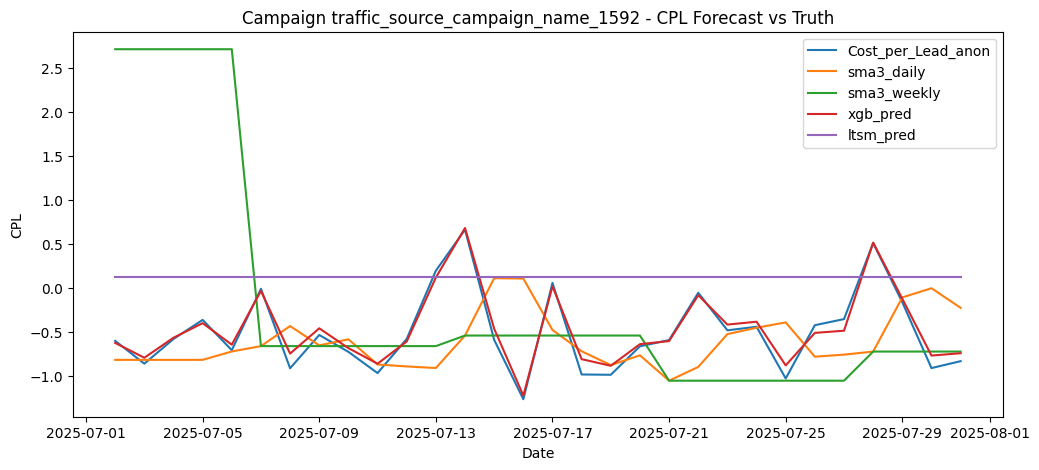

In [26]:
# Example
campaign = 'traffic_source_campaign_name_1592'
cols = ['Cost_per_Lead_anon','sma3_daily','sma3_weekly','xgb_pred', 'ltsm_pred']
plot_campaign_predictions(test_df, campaign, '2025-07-01', '2025-07-31', cols)